<br><br><center><h1 style="font-size:2em;color:#2467C0">Caso de estudio: Delitos en México</h1></center>
<br>
<table>
<col width="550">
<col width="450">
<tr>

# 1. Importar librerías generales

In [1]:
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sn

# %matplotlib inline

# 2. Obtención de datos

In [2]:
df = pd.read_csv('datos/indice_paz_mex_impacto-economico_2020.csv', encoding = 'ISO-8859-1') 

In [3]:
df.head()

,Estados,Homicidio,Delitos_con_violencia,Delitos_con_armas_fuego,Delincuencia_organizada,Carcel_Sin_sentencia,Impacto_economico_de_la_violencia,Impacto_economico_per_capita_de_la_violencia,porcen_pib
0,AGUASCALIENTES,1.368,3.167,1.490,3.425,1.307,51.9,"36,158",14.5
1,BAJA_CALIFORNIA,5.000,3.296,5.000,5.000,2.110,259.6,"71,413",31.5
2,BAJA_CALIFORNIA_SUR,1.554,3.411,1.274,5.000,1.496,28.8,"35,761",13.4
3,CAMPECHE,1.533,1.223,1.345,1.723,4.297,21.6,"21,543",2.2
4,CHIAPAS,1.544,1.444,1.372,1.629,2.874,78.7,"13,742",17.8


In [4]:
df.dtypes

Estados                                          object
Homicidio                                       float64
Delitos_con_violencia                           float64
Delitos_con_armas_fuego                         float64
Delincuencia_organizada                         float64
Carcel_Sin_sentencia                            float64
Impacto_economico_de_la_violencia               float64
Impacto_economico_per_capita_de_la_violencia     object
porcen_pib                                      float64
dtype: object

In [5]:
df.head()

,Estados,Homicidio,Delitos_con_violencia,Delitos_con_armas_fuego,Delincuencia_organizada,Carcel_Sin_sentencia,Impacto_economico_de_la_violencia,Impacto_economico_per_capita_de_la_violencia,porcen_pib
0,AGUASCALIENTES,1.368,3.167,1.490,3.425,1.307,51.9,"36,158",14.5
1,BAJA_CALIFORNIA,5.000,3.296,5.000,5.000,2.110,259.6,"71,413",31.5
2,BAJA_CALIFORNIA_SUR,1.554,3.411,1.274,5.000,1.496,28.8,"35,761",13.4
3,CAMPECHE,1.533,1.223,1.345,1.723,4.297,21.6,"21,543",2.2
4,CHIAPAS,1.544,1.444,1.372,1.629,2.874,78.7,"13,742",17.8


In [6]:
df.columns

Index(['Estados', 'Homicidio', 'Delitos_con_violencia',
       'Delitos_con_armas_fuego', 'Delincuencia_organizada',
       'Carcel_Sin_sentencia', 'Impacto_economico_de_la_violencia',
       'Impacto_economico_per_capita_de_la_violencia', 'porcen_pib'],
      dtype='object')

In [7]:
# Para agregar el id
df['Estados'] = df['Estados'].str.replace('_', ' ')
df = df.set_index('Estados')
df.head()

,Homicidio,Delitos_con_violencia,Delitos_con_armas_fuego,Delincuencia_organizada,Carcel_Sin_sentencia,Impacto_economico_de_la_violencia,Impacto_economico_per_capita_de_la_violencia,porcen_pib
Estados,,,,,,,,
AGUASCALIENTES,1.368,3.167,1.490,3.425,1.307,51.9,"36,158",14.5
BAJA CALIFORNIA,5.000,3.296,5.000,5.000,2.110,259.6,"71,413",31.5
BAJA CALIFORNIA SUR,1.554,3.411,1.274,5.000,1.496,28.8,"35,761",13.4
CAMPECHE,1.533,1.223,1.345,1.723,4.297,21.6,"21,543",2.2
CHIAPAS,1.544,1.444,1.372,1.629,2.874,78.7,"13,742",17.8


In [8]:
# Leyendo id
df_id = pd.read_csv('datos/estados_id.csv')
df_id.head()

,ENTIDAD,IDNAME
0,Aguascalientes,AS
1,Baja California,BC
2,Baja California Sur,BS
3,Campeche,CC
4,CDMX,DF


In [9]:
# Haciendo que coincidan los nombres
df_id['ENTIDAD'] = df_id['ENTIDAD'].str.upper()
df_id['ENTIDAD'].iloc[4] = 'CIUDAD DE MÉXICO'
df_id.columns = ['Estados', 'id']
df_id = df_id.set_index('Estados')
df_id.head()

,id
Estados,
AGUASCALIENTES,AS
BAJA CALIFORNIA,BC
BAJA CALIFORNIA SUR,BS
CAMPECHE,CC
CIUDAD DE MÉXICO,DF


In [10]:
# Juntando los dataframes
df = df.join(df_id)
df.head()

,Homicidio,Delitos_con_violencia,Delitos_con_armas_fuego,Delincuencia_organizada,Carcel_Sin_sentencia,Impacto_economico_de_la_violencia,Impacto_economico_per_capita_de_la_violencia,porcen_pib,id
Estados,,,,,,,,,
AGUASCALIENTES,1.368,3.167,1.490,3.425,1.307,51.9,"36,158",14.5,AS
BAJA CALIFORNIA,5.000,3.296,5.000,5.000,2.110,259.6,"71,413",31.5,BC
BAJA CALIFORNIA SUR,1.554,3.411,1.274,5.000,1.496,28.8,"35,761",13.4,BS
CAMPECHE,1.533,1.223,1.345,1.723,4.297,21.6,"21,543",2.2,CC
CHIAPAS,1.544,1.444,1.372,1.629,2.874,78.7,"13,742",17.8,CS


# 3. Análisis Exploratorio

In [11]:
#Principales parámetros estadísticos
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Homicidio,32.0,2.720625,1.287674,1.167,1.63275,2.1860,3.59925,5.000
Delitos_con_violencia,32.0,2.705656,0.847171,1.133,2.27850,2.7295,3.30025,4.783
Delitos_con_armas_fuego,32.0,2.575781,1.260074,1.042,1.49675,2.3575,3.15475,5.000
Delincuencia_organizada,32.0,2.883594,1.102784,1.454,1.82275,2.7020,3.57425,5.000
Carcel_Sin_sentencia,32.0,1.895000,0.862432,1.271,1.41700,1.5270,1.89400,5.000
Impacto_economico_de_la_violencia,32.0,147.328125,132.126921,21.600,60.65000,100.3000,199.22500,589.700
porcen_pib,32.0,20.946875,12.109766,2.200,13.77500,17.1500,29.62500,44.100


/home/manuel/.pyenv/versions/3.11.4/envs/DS/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


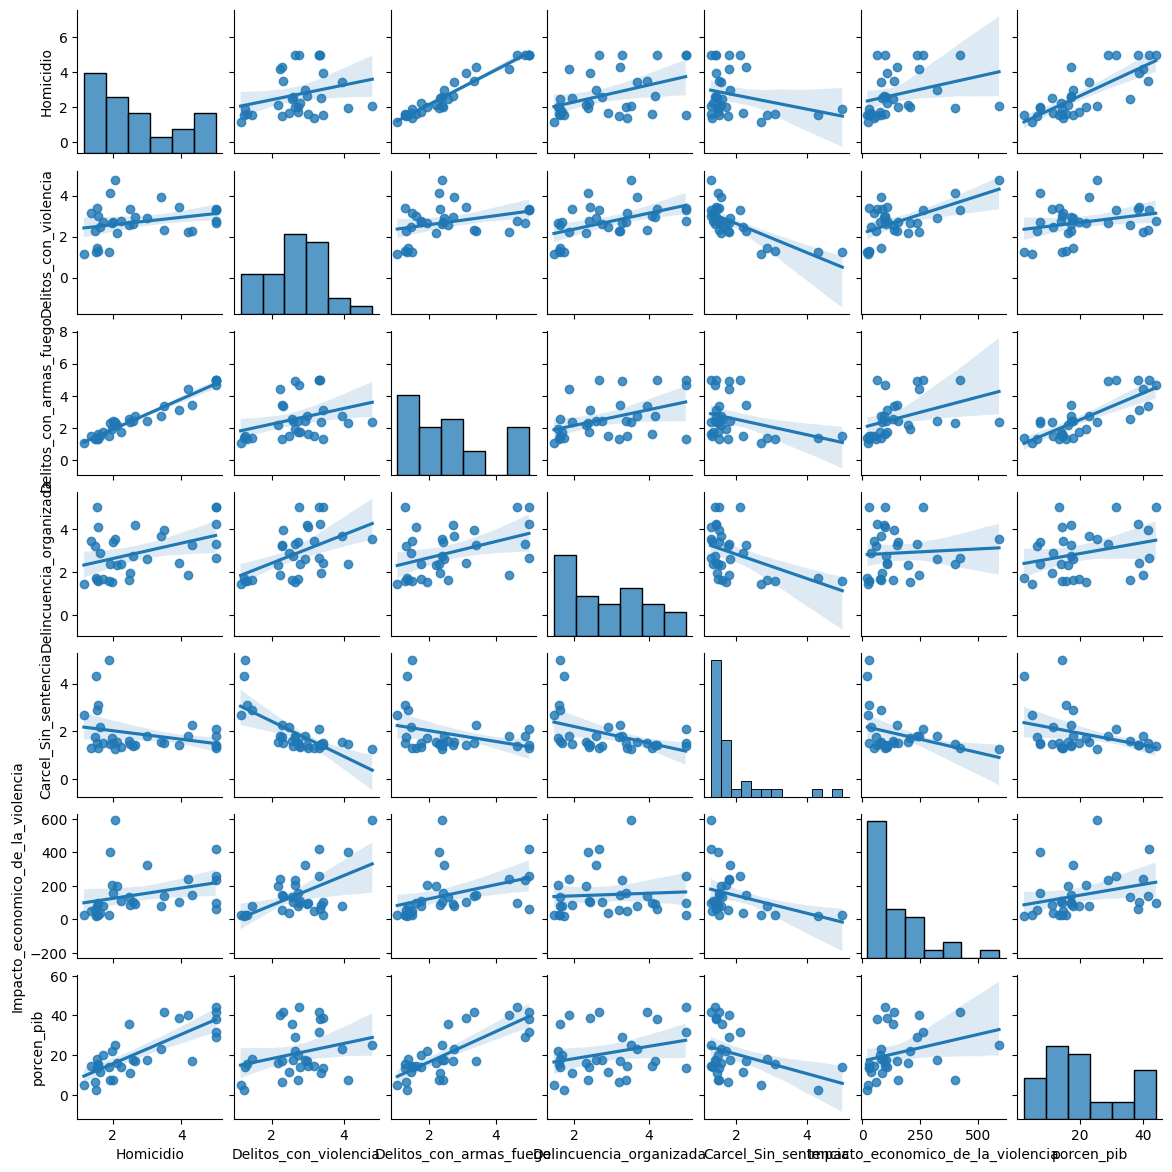

In [12]:
# Correlación lineal de variables
sn.pairplot(df, kind="reg",  height=1.7 , aspect=1)

# 4. Correlación de variables

In [13]:
# Las variables a analizar serán:
atributos = ['Homicidio', 'Delitos_con_violencia', 'Delincuencia_organizada', 'Delitos_con_armas_fuego']

<Axes: >

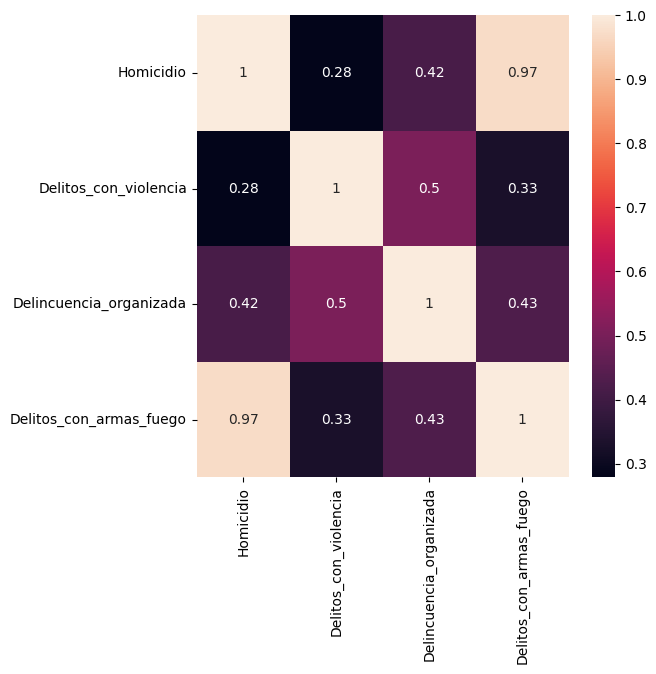

In [14]:
plt.figure(figsize=(6,6))
sn.heatmap(df[atributos].corr(), annot=True)

Se observa una correlación lineal entre el número de homicidios y los delitos con armas de fuego. En el análisis se incluirán las dos variables.

# 5. Normalización de datos

In [15]:
#Re-esalamiento de variables
from sklearn import preprocessing
df_standardized = preprocessing.scale(df[atributos])

(array([5., 7., 5., 4., 1., 1., 1., 2., 1., 5.]),
 array([-1.225842  , -0.92341043, -0.62097887, -0.31854731, -0.01611574,
         0.28631582,  0.58874738,  0.89117894,  1.19361051,  1.49604207,
         1.79847363]),
 <BarContainer object of 10 artists>)

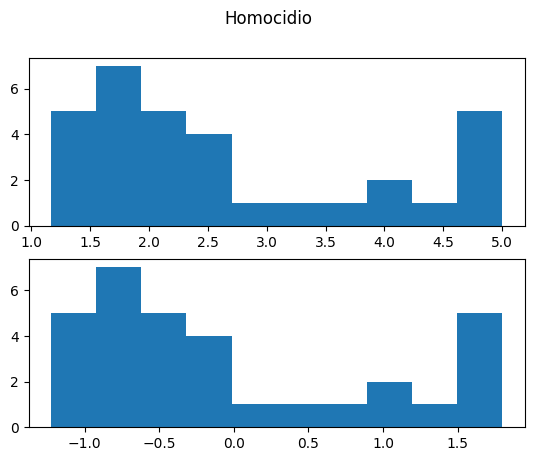

In [16]:
#Comparación antes y despues de la normalización (re-escalamiento)
Murder_list=df_standardized[:,:1].flatten()
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Homocidio')
ax1.hist(df['Homicidio'])
ax2.hist( Murder_list)

In [17]:
# Data frame que servirá para la predicción de grupos
df_standardized = pd.DataFrame(df_standardized)

In [18]:
df_standardized.head()

,0,1,2,3
0,-1.067249,0.553284,0.498801,-0.875468
1,1.798474,0.707992,1.949857,1.954654
2,-0.920491,0.845910,1.949857,-1.049630
3,-0.937060,-1.778131,-1.069262,-0.992382
4,-0.928381,-1.513088,-1.155864,-0.970612


# 6. Separación de los datos en grupos

In [19]:
# Llamamos al algoritmo y lo ejecutamos  para 1 cluster
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 1, init = 'k-means++', random_state = 42, n_init='auto')
kmeans.fit(df_standardized)
# Valor de WCSS
kmeans.inertia_

128.00000000000003

# 7. Método del codo

In [20]:
# Se obtienen los diferentes valores de WCSS 
wcss = []
for i in range(1, 13):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42, n_init='auto')
    kmeans.fit(df_standardized)
    wcss.append(kmeans.inertia_)

In [21]:
wcss

[128.0,
 71.65969327653953,
 46.0790946467882,
 38.02085292761427,
 31.82534301900319,
 29.030878688992686,
 18.834888928624412,
 17.436705870135405,
 14.552449921928353,
 11.46764125639452,
 9.243196004257808,
 8.072679022505051]

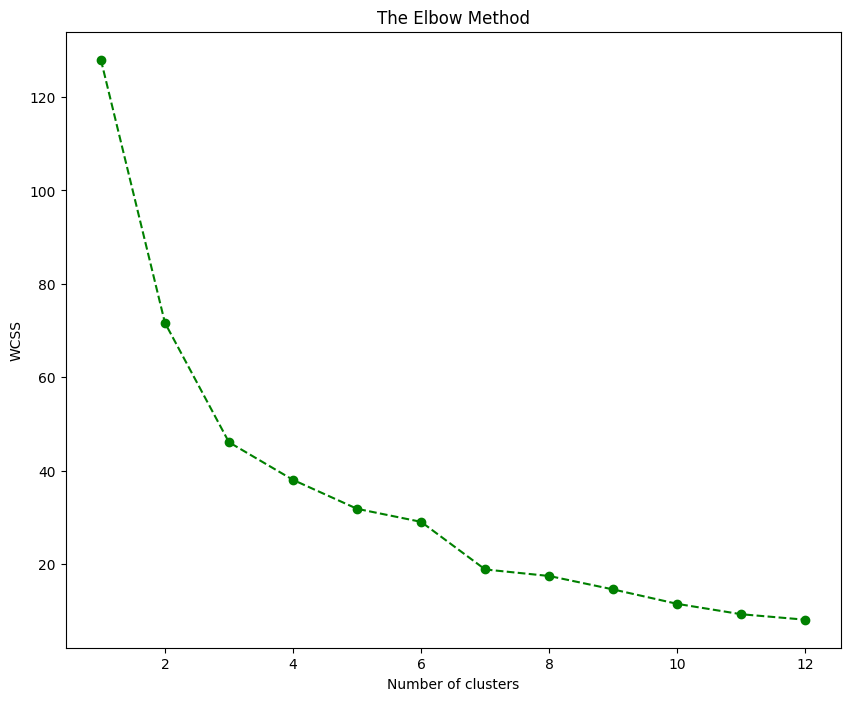

In [22]:
# Grafica de los valores de WCSS 
plt.figure(figsize=(10, 8))
plt.plot(range(1, 13), wcss,"go--")
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# 7.1 Método Silhouette

In [23]:
from sklearn.metrics import silhouette_score

In [24]:
silhouette_score(df_standardized,  kmeans.labels_)

0.3487847700946626

In [25]:
kmeans.labels_

array([ 5,  2,  6,  4,  4,  7,  5,  2,  5,  7,  3,  0,  8,  9,  9, 10,  8,
        4, 11,  0,  0,  6,  1, 11,  8,  3,  8,  0,  4,  0,  4,  2],
      dtype=int32)

In [26]:
#creamos una lista de modelos de K-Means de un determinado número de clusters llamado kmeans2_sil
kmeans2_sil= [KMeans(n_clusters=i, random_state=42, init='k-means++', n_init='auto').fit(df_standardized) for i in range(1,13)]

#calculamos el silhouette score a cada modelo (de diferente número de clusters)
sil_values = [ silhouette_score(df_standardized, model.labels_, random_state=11)
                    for model in kmeans2_sil[1:]
                   ]
#Guardamos los valores de los coeficientes en un arreglo de numpy
sil_values = np.array( sil_values )
sil_values

array([0.37464155, 0.33046133, 0.31613405, 0.31102337, 0.30876654,
       0.39165478, 0.31905632, 0.32215614, 0.34189452, 0.35893323,
       0.34878477])

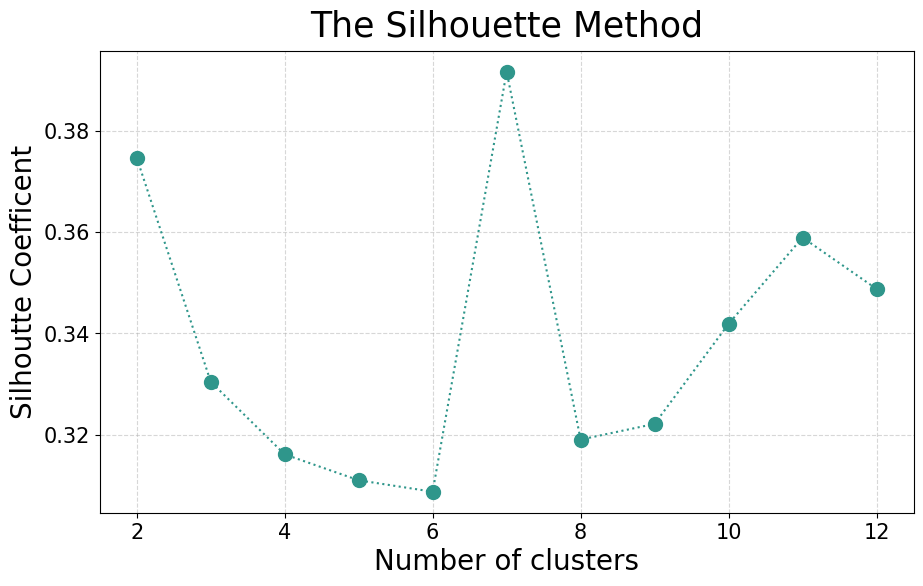

In [27]:
plt.figure( figsize=(10.5,6)       )

plt.plot(range(2, 13), sil_values,
         linestyle = ':', linewidth = 1.5,
         marker = 'o', markersize = 10,
         color = '#2F968B' ,
         label = 'The Silhoutte Method'
        )

#Maquillar la gráfica
plt.title('The Silhouette Method', size = 25, pad = 10)
plt.xlabel('Number of clusters', size = 20)
plt.ylabel('Silhoutte Coefficent', size = 20)
plt.tick_params( labelsize = 15 )

plt.grid(linestyle = 'dashed', alpha = 0.5 )

plt.show()

In [28]:
print( 'El valor máximo es:', sil_values[ np.argmax(sil_values) ] )
print( 'El número óptimo de clusters es:', np.argmax(sil_values) + 1 + 1 )

El valor máximo es: 0.3916547843812458
El número óptimo de clusters es: 7


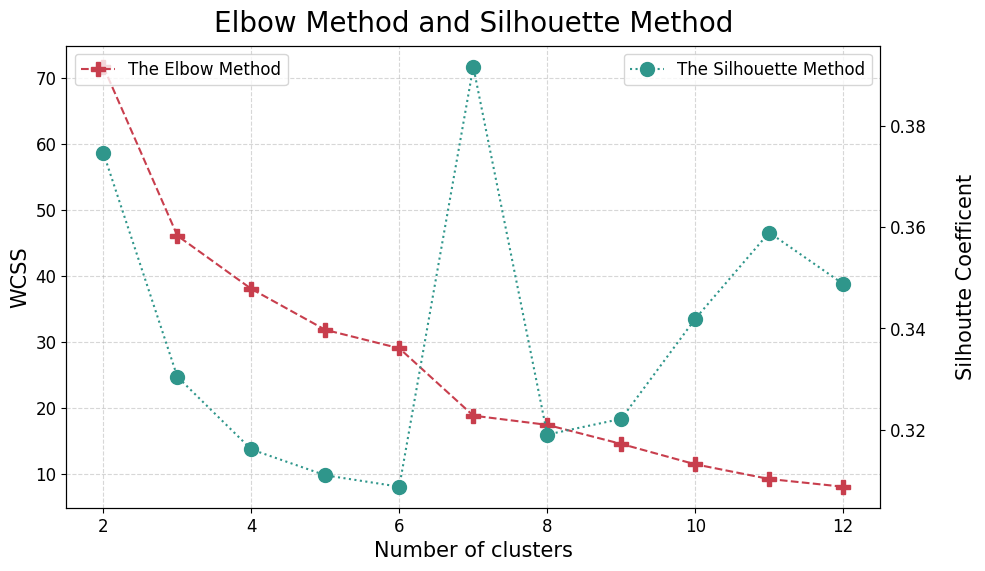

In [29]:
fig , ax1 = plt.subplots( figsize = (10.5,6) )

ax1.set_title('Elbow Method and Silhouette Method', size = 20, pad = 10 )
#--------------- WCSS -----------------
ax1.plot( range(2,13), wcss[1:],
         linestyle = '--', linewidth = 1.5,
         marker = 'P', markersize = 10,
         color = '#C83E4D' ,
         label = 'The Elbow Method'
        )

#----------- optimal number of clusters -----------------

ax1.set_xlabel( 'Number of clusters', size = 15 )
ax1.set_ylabel('WCSS', size = 15 )
ax1.tick_params( axis = 'x', labelsize = 12 )
ax1.tick_params( axis = 'y', labelsize = 12 )

plt.legend(loc='upper left', prop = {'size':12})


# ------------- silhoutte coeff -------------
ax2 = ax1.twinx()
ax2.plot( range(2,13), sil_values,
         linestyle = ':', linewidth = 1.5,
         marker = 'o', markersize = 10,
         color = '#2F968B' ,
         label = 'The Silhouette Method'
        )

ax2.set_ylabel( '\nSilhoutte Coefficent', size = 15 )
ax2.tick_params( axis = 'y', labelsize = 12 )
plt.legend(loc='upper right', prop = {'size':12})


ax1.grid(  linestyle = 'dashed', alpha = 0.5 )

plt.show()


Se observa que con el método Silhouette se tiene un máximo con siete clusters, esto está confirmado  por el método Elbow, donde el último cambio importante está precisamente en 7 clusters. Se trabajará con 7 clusters.

# 7. Análisis de resultados

In [30]:
# Predicción de etiquetas
kmeans = KMeans(n_clusters = 7, init = 'k-means++', random_state = 42, n_init='auto')
y_kmeans = kmeans.fit_predict(df_standardized)
y_kmeans

array([3, 2, 3, 0, 0, 5, 3, 2, 3, 5, 4, 6, 6, 1, 1, 4, 6, 0, 3, 6, 6, 3,
       1, 3, 6, 4, 6, 6, 0, 6, 0, 2], dtype=int32)

In [31]:
# Cambiamos los valores de los grupos para comenzar en 1 y lo agregamos al dataframe original
df['cluster'] = y_kmeans + 1
df.head()

,Homicidio,Delitos_con_violencia,Delitos_con_armas_fuego,Delincuencia_organizada,Carcel_Sin_sentencia,Impacto_economico_de_la_violencia,Impacto_economico_per_capita_de_la_violencia,porcen_pib,id,cluster
Estados,,,,,,,,,,
AGUASCALIENTES,1.368,3.167,1.490,3.425,1.307,51.9,"36,158",14.5,AS,4
BAJA CALIFORNIA,5.000,3.296,5.000,5.000,2.110,259.6,"71,413",31.5,BC,3
BAJA CALIFORNIA SUR,1.554,3.411,1.274,5.000,1.496,28.8,"35,761",13.4,BS,4
CAMPECHE,1.533,1.223,1.345,1.723,4.297,21.6,"21,543",2.2,CC,1
CHIAPAS,1.544,1.444,1.372,1.629,2.874,78.7,"13,742",17.8,CS,1


<Axes: xlabel='Homicidio', ylabel='Delitos_con_violencia'>

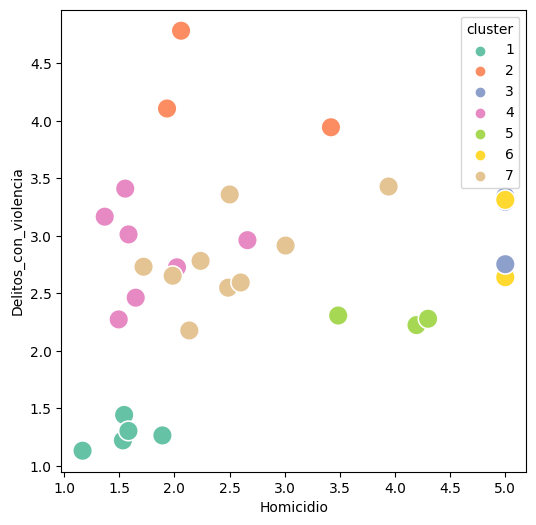

In [32]:
# Observamos la distribución de grupos en un par de variables
plt.figure(figsize=(6,6))
sn.scatterplot(x='Homicidio', y = 'Delitos_con_violencia', hue='cluster',  
               palette=sn.color_palette("Set2")[:7] , data=df, s=200)

/home/manuel/.pyenv/versions/3.11.4/envs/DS/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


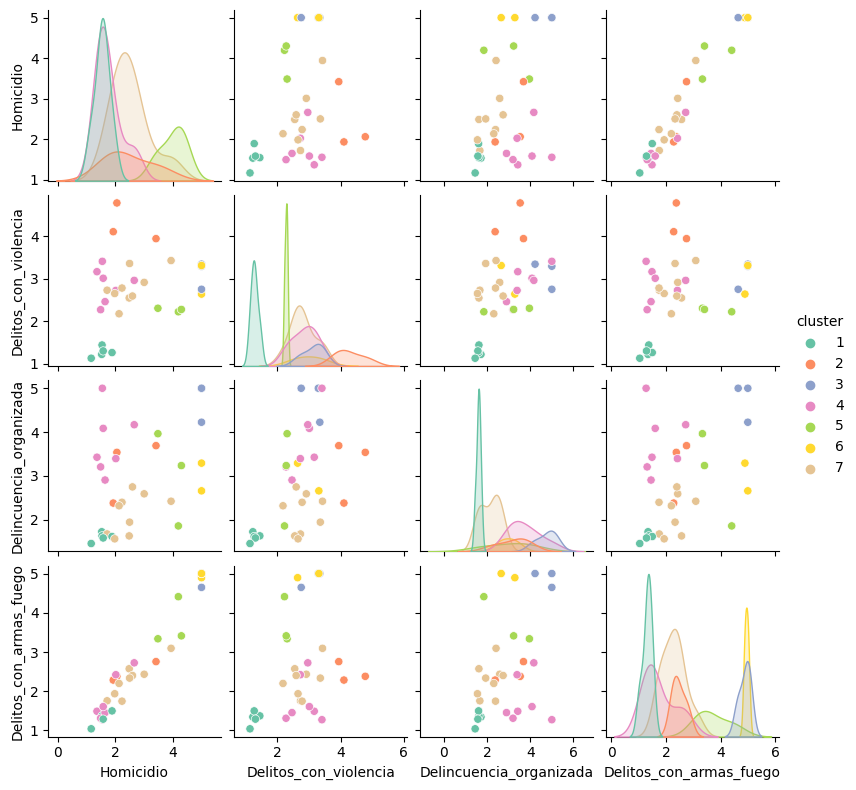

In [33]:
# #Comparando a pares las variables
sn.pairplot(df[atributos + ['cluster']], hue="cluster",  palette=sn.color_palette("Set2")[:7],height=2 , aspect=1)
plt.show()

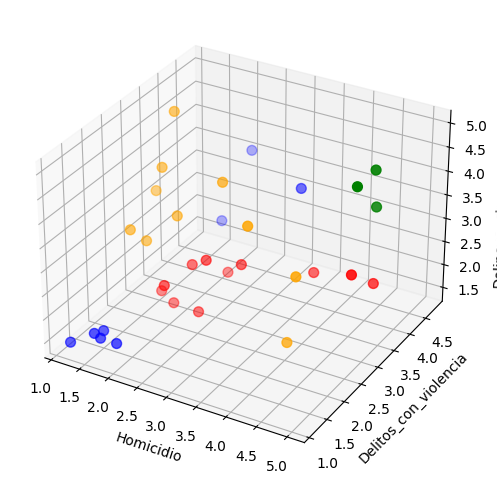

In [34]:
# Visualizando los grupos en función de tres variables
#%matplotlib notebook
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors

fig = plt.figure(figsize=(8, 6))
#ax = Axes3D(fig)
ax = fig.add_subplot(projection='3d')

x = df['Homicidio']
y = df['Delitos_con_violencia']
z = df['Delincuencia_organizada']
colors = df['cluster']
cmap = matplotlib.colors.ListedColormap(['blue','green','orange','red'])
g=ax.scatter(x, y, z, s=50,  c =  colors  , cmap=cmap  )

ax.set_xlabel('Homicidio')
ax.set_ylabel('Delitos_con_violencia')
ax.set_zlabel('Delincuencia_organizada')

legend = ax.legend(*g.legend_elements(), loc="lower center", title="Cluster", borderaxespad=-10, ncol=4)
ax.add_artist(legend)
#ax.view_init(elev=20, azim=35, roll=0)


plt.show()

In [35]:
# Se define un dataframe para mostrar la informacion en un mapa
df_map  = df
df_map.head()

,Homicidio,Delitos_con_violencia,Delitos_con_armas_fuego,Delincuencia_organizada,Carcel_Sin_sentencia,Impacto_economico_de_la_violencia,Impacto_economico_per_capita_de_la_violencia,porcen_pib,id,cluster
Estados,,,,,,,,,,
AGUASCALIENTES,1.368,3.167,1.490,3.425,1.307,51.9,"36,158",14.5,AS,4
BAJA CALIFORNIA,5.000,3.296,5.000,5.000,2.110,259.6,"71,413",31.5,BC,3
BAJA CALIFORNIA SUR,1.554,3.411,1.274,5.000,1.496,28.8,"35,761",13.4,BS,4
CAMPECHE,1.533,1.223,1.345,1.723,4.297,21.6,"21,543",2.2,CC,1
CHIAPAS,1.544,1.444,1.372,1.629,2.874,78.7,"13,742",17.8,CS,1


In [36]:
# Información geográfica de México
estados_geo='datos/estadosGEO_mx.json'

In [37]:
# Librería Python que permite crear mapas interactivos 
import folium
import branca.colormap as cm
# Color
colormap = cm.LinearColormap(['#9b5fe0','#16a4d8','#60dbe8','#8bd346','#efdf48','#f9a52c', '#d64e12'],
                             vmin=0.5, vmax=7.5).to_step(7)
colormap

In [38]:
# El número del cluster en función del id
id_dict = df.set_index("id")["cluster"]
id_dict["BC"]

3

In [39]:
# Un color en función del id
color_dict = {key: colormap(id_dict[key]) for key in id_dict.keys()}
color_dict["BC"]

'#60dbe8ff'

In [40]:
map = folium.Map(location=[24, -102], tiles='cartodbpositron',zoom_start=5)

folium.GeoJson(
    estados_geo,
    style_function=lambda feature: {
        'fillColor': color_dict[feature["id"]],
        "color": "black",
        "weight": 1,
        "dashArray": "5, 5",
        "fillOpacity": 0.9,
        }
    ).add_to(map)

colormap.caption = "Grupo"
colormap.add_to(map)
map

/home/manuel/.pyenv/versions/3.11.4/envs/DS/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


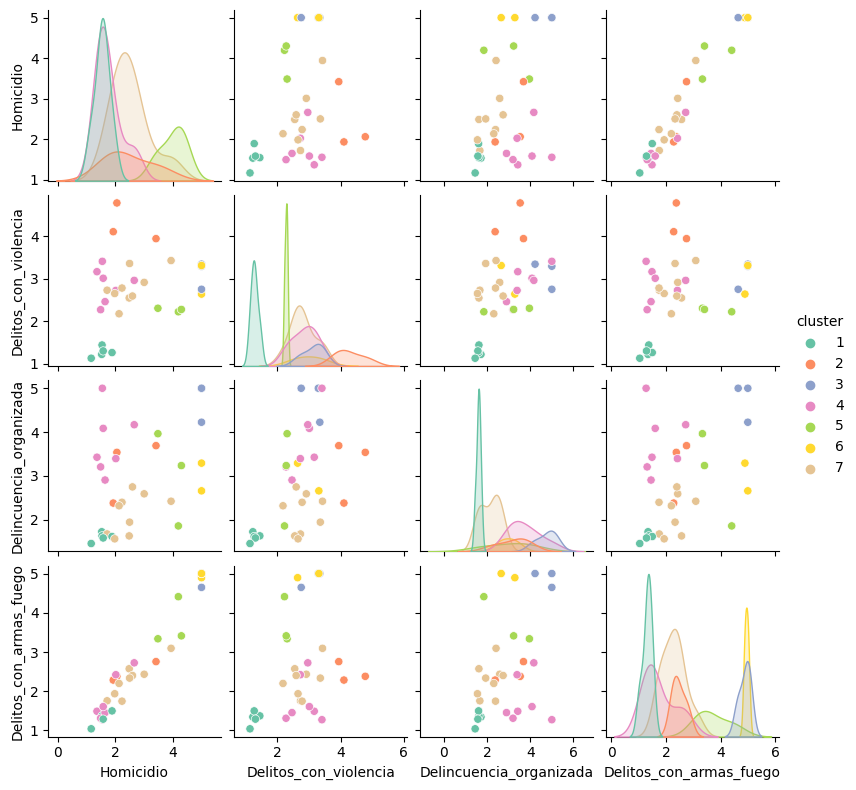

In [41]:
sn.pairplot(df[atributos + ['cluster']], hue="cluster",  palette=sn.color_palette("Set2")[:7],height=2 , aspect=1)
plt.show()

## Observaciones

Grupo 1 (morado): La región del Sureste y algunos estados en el centro se caracterizan por tener bajos índices delictivos.

Grupo 2 (azul fuerte): Quintana Roo, CDMX y Estado de México. Tiene valores promedio en delito con armas de fuego y en homicidios, pero tienen altos índices en delitos con violencia y delincuencia organizada.

Grupo 3 (azul claro): Tiene altos índices de homicidios, delincuencia organizada y delitos con armas de fuego, y un índice en delitos con violencia en 2.5.

Grupo 4 (verde): Índice de homicidio y delitos con armas de fuego en 2. Alta delincuencia organizada y un índice de delitos con violencia en 2.5

Grupo 5 (amarillo): Índice de homicidio de 4, delitos con violencia de 2, delincuencia organizada de 2.5 y delitos con armas de fuego de 3.

Grupo 6 (naranja): Altos índices de homicidio y delitos con armas de fuego. Delitos con violencia y delincuencia organizada de 2.5

Grupo 7 (rojo-cafe): Todos los índices están entre 2 y 2.75, aproximadamente.

## Conclusiones

Con el método Silhoutte se obtuvo de manera óptima el número de clusters a elegir. Se puede observar que los 7 clusters sí tienen relación que describe de manera general al estado en cuestión. Se puede observar que los clusters sí se agrupan por regiones en el mapa de México (no en todos los casos), por lo que hay una relación geográfica o social de cada grupo.